In [2]:
import numpy as np
import pandas as pd
import neurokit as nk
import wfdb
%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


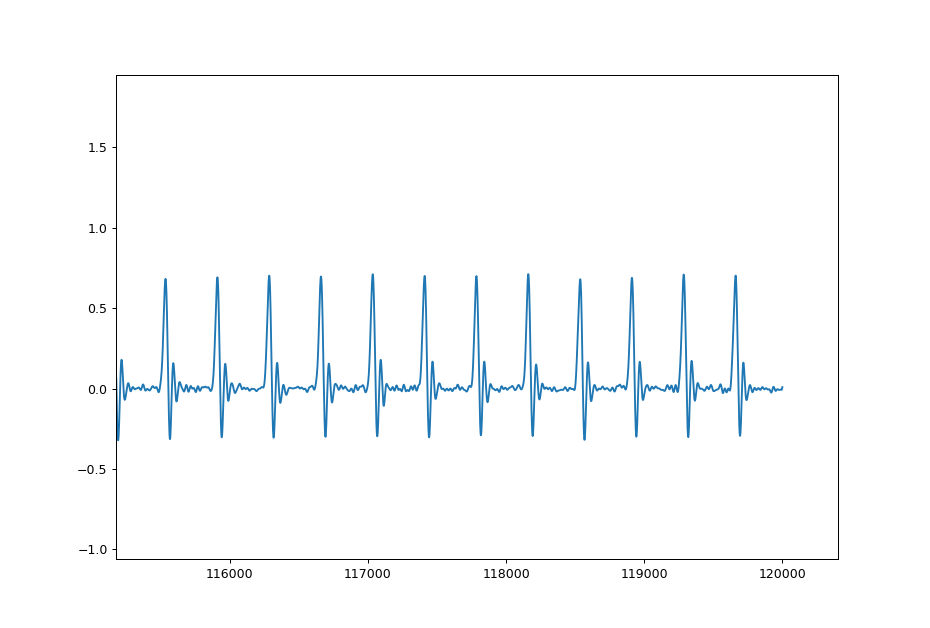

In [7]:
#creating a ecg simulation of 2 min
%pylab notebook
ecg = nk.ecg_simulate(duration = 240, sampling_rate = 500, bpm = 80, noise = 0.01)
pd.Series(ecg).plot() #plottin 5 sec

In [8]:
chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units)

NameError: name 'chan' is not defined

In [16]:
ecg.shape

(120000,)

In [104]:
bio = nk.bio_process(ecg = ecg, add = events_1, sampling_rate = 500)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


    Using multitaper spectrum estimation with 1 DPSS windows


AttributeError: 'dict' object has no attribute 'reset_index'

In [86]:
bio

{'ECG': {'R_Peaks': array([   412,    787,   1166,   1536,   1912,   2291,   2660,   3036,
           3411,   3791,   4161,   4536,   4911,   5286,   5661,   6037,
           6416,   6787,   7161,   7537,   7911,   8286,   8666,   9036,
           9412,   9786,  10161,  10537,  10916,  11287,  11661,  12036,
          12411,  12787,  13161,  13536,  13916,  14286,  14666,  15036,
          15411,  15786,  16161,  16536,  16911,  17291,  17666,  18037,
          18412,  18786,  19166,  19536,  19911,  20286,  20661,  21036,
          21416,  21787,  22161,  22541,  22916,  23291,  23661,  24036,
          24411,  24786,  25161,  25541,  25911,  26286,  26661,  27041,
          27411,  27786,  28161,  28536,  28916,  29286,  29661,  30041,
          30416,  30786,  31167,  31541,  31911,  32286,  32661,  33036,
          33411,  33786,  34166,  34536,  34911,  35287,  35665,  36036,
          36411,  36786,  37161,  37536,  37912,  38287,  38660,  39037,
          39411,  39791,  40160, 

In [64]:
type(ecg)

numpy.ndarray

In [54]:
#creating events array
events = []
for j in range(4):
    for n in range(30000):
        if j == 1 or j==3:
            events.append(1) 
        else:
            events.append(-2) 

            len(events)

120000

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


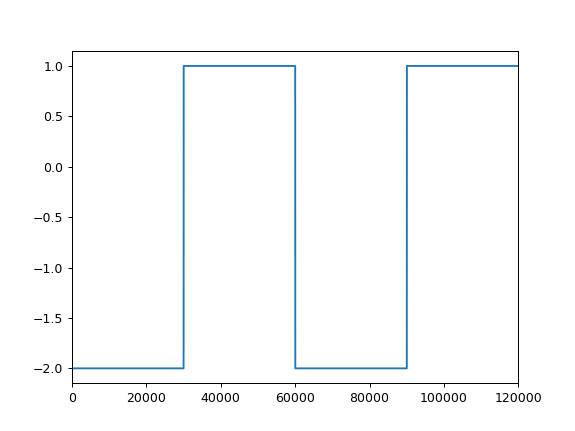

In [101]:
#plotting events
%pylab notebook  
pd.Series(events).plot()

In [99]:
#bio_df = pd.DataFrame.from_dict(bio['ECG'], orient = 'columns')
bio_df['events'] = events
bio_df

ValueError: arrays must all be same length

In [56]:
#creating a dataframe with the ecg and the events
df = pd.DataFrame(ecg)
df.columns = ['ECG']
df['events'] = events
df.head()

,ECG,events
0,0.035834,-2
1,0.040601,-2
2,0.046150,-2
3,0.052613,-2
4,0.060128,-2


In [57]:
#finding events
events_1 = nk.find_events(df['events'], cut = 'lower', treshold = 0)
events_1

{'onsets': array([    0, 60000]), 'durations': array([30000, 30000])}

In [80]:
#creating epochs
epochs = nk.create_epochs(df['ECG'], events_1['onsets'], sampling_rate = 500, duration = 60, onset = 0)

In [81]:
type(epochs)

dict

In [82]:
epochs

{0:           Signal  Epoch_Relative_Time  Epoch_Absolute_Time
 0.000   0.035834                    0                    0
 0.002   0.040601                    1                    1
 0.004   0.046150                    2                    2
 0.006   0.052613                    3                    3
 0.008   0.060128                    4                    4
 0.010   0.068832                    5                    5
 0.012   0.078860                    6                    6
 0.014   0.090336                    7                    7
 0.016   0.103373                    8                    8
 0.018   0.118063                    9                    9
 0.020   0.134475                   10                   10
 0.022   0.152650                   11                   11
 0.024   0.172599                   12                   12
 0.026   0.194295                   13                   13
 0.028   0.217678                   14                   14
 0.030   0.242649                   1

<IPython.core.display.Javascript object>


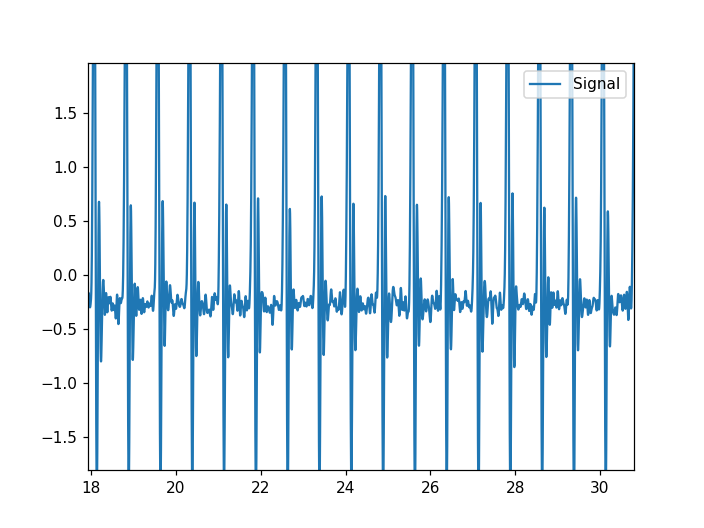

In [83]:
#normalizing singal and plotting
nk.z_score(epochs[0][["Signal"]]).plot()

In [105]:
#bio_process of signal in epochs[0]
bio1 = nk.bio_process(ecg = epochs[0]['Signal'], sampling_rate = 500)
bio1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


    Using multitaper spectrum estimation with 7 DPSS windows


{'ECG': {'R_Peaks': array([  412,   787,  1166,  1536,  1912,  2291,  2660,  3036,  3411,
          3791,  4161,  4536,  4911,  5286,  5661,  6037,  6416,  6787,
          7161,  7537,  7911,  8286,  8666,  9036,  9412,  9786, 10161,
         10537, 10916, 11287, 11661, 12036, 12411, 12787, 13161, 13536,
         13916, 14286, 14666, 15036, 15411, 15786, 16161, 16536, 16911,
         17291, 17666, 18037, 18412, 18786, 19166, 19536, 19911, 20286,
         20661, 21036, 21416, 21787, 22161, 22541, 22916, 23291, 23661,
         24036, 24411, 24786, 25161, 25541, 25911, 26286, 26661, 27041,
         27411, 27786, 28161, 28536, 28916, 29286, 29661]),
  'Cardiac_Cycles':                                   0         1         2         3         4   \
  2019-07-08 17:55:34.953800  0.004093 -0.007883  0.009859  0.008070  0.022945   
  2019-07-08 17:55:34.955800  0.007766 -0.008305  0.010732  0.009297  0.021867   
  2019-07-08 17:55:34.957800  0.011436 -0.008413  0.011417  0.010622  0.020410   


<IPython.core.display.Javascript object>


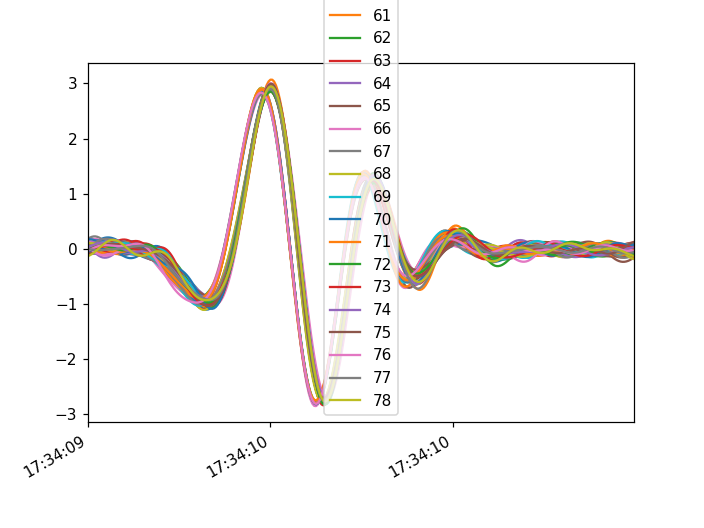

In [92]:
#plotting individual beats of epoch 0 on the same graph 
nk.z_score(bio1['ECG']["Cardiac_Cycles"]).plot()

In [112]:
data = {}  # Initialize an empty dict
for epoch_index in epochs:
    data[epoch_index] = {}  # Initialize an empty dict for the current epoch
    epoch = epochs[epoch_index]

    # ECG
    baseline = bio1['df']["ECG_RR_Interval"].mean()  # Baseline
    rr_max = bio1['df']["ECG_RR_Interval"].iloc[0:400].max()  # Maximum RR interval
    data[epoch_index]["HRV_MaxRR"] = rr_max - baseline  # Corrected for baseline

    
data = pd.DataFrame.from_dict(data, orient="index")  # Convert to a dataframe
data["Condition"] = ['Low', 'High']  # Add the conditions
data  # Print

,HRV_MaxRR,Condition
0,12.627745,Low
1,12.627745,High
